# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import csv
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

581

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
# Set url and assign units measure in F 
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

# Build partial query URL
query_url = f'{url}appid={weather_api_key}&units={units}&q='

number = 1
set_num = 1

# List that's used to store the data for each city
weather_data = []

print('Beginning Data Retrieval')
print('---------------------------')
for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        weather_check = response['weather']
        weather_data.append(response)     #collecting the data for 'weather_data' list
        
        print(f'Processing Record {number} of Set {set_num} | {city}')
        number +=1 
        if number == 51:
            number=0
            set_num +=1 
    except:
        print('City not found. Skipping...')
        pass
print('---------------------------')
print('Data Retrieval Complete')
print('---------------------------')

# I wrote the code to match the output that was given (the answer in the cell without the code).
# If it was up to me how to group the Sets, I would start counting Processing Record from 1 
# instead 0. That way we would get 50 Records per Set. 

# Otherwise, when we start counting Processing Records from 0 (in each Set), in results 
# it gives us 51 records per Set.

Beginning Data Retrieval
---------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | lorengau
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | el cope
City not found. Skipping...
Processing Record 7 of Set 1 | ampanihy
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | beringovskiy
City not found. Skipping...
Processing Record 10 of Set 1 | mangrol
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | ancud
Processing Record 13 of Set 1 | coquimbo
Processing Record 14 of Set 1 | upington
Processing Record 15 of Set 1 | cidreira
City not found. Skipping...
Processing Record 16 of Set 1 | uray
Processing Record 17 of Set 1 | fort nelson
Processing Record 18 of Set 1 | westport
Processing Record 19 of Set 1 | sibolga
Processing Record 20 of Set 1 | hamilton
Processing Record 21 of Set 1 | cutro
Processing Record

Processing Record 37 of Set 4 | garowe
Processing Record 38 of Set 4 | cairns
Processing Record 39 of Set 4 | nome
Processing Record 40 of Set 4 | santa fe
Processing Record 41 of Set 4 | salta
Processing Record 42 of Set 4 | ostrovnoy
Processing Record 43 of Set 4 | saskylakh
Processing Record 44 of Set 4 | buta
Processing Record 45 of Set 4 | serebryansk
Processing Record 46 of Set 4 | paamiut
Processing Record 47 of Set 4 | husavik
Processing Record 48 of Set 4 | provideniya
Processing Record 49 of Set 4 | namibe
Processing Record 50 of Set 4 | uyskoye
Processing Record 0 of Set 5 | bom jardim
Processing Record 1 of Set 5 | sinaia
Processing Record 2 of Set 5 | biskamzha
Processing Record 3 of Set 5 | borogontsy
Processing Record 4 of Set 5 | aquiraz
Processing Record 5 of Set 5 | naliya
Processing Record 6 of Set 5 | damietta
Processing Record 7 of Set 5 | progreso
Processing Record 8 of Set 5 | bengkulu
Processing Record 9 of Set 5 | warrnambool
Processing Record 10 of Set 5 | geo

Processing Record 22 of Set 8 | vrede
Processing Record 23 of Set 8 | tyukhtet
Processing Record 24 of Set 8 | the valley
Processing Record 25 of Set 8 | portland
Processing Record 26 of Set 8 | makakilo city
Processing Record 27 of Set 8 | laguna de perlas
Processing Record 28 of Set 8 | karakulino
Processing Record 29 of Set 8 | namatanai
City not found. Skipping...
Processing Record 30 of Set 8 | alofi
Processing Record 31 of Set 8 | porto belo
Processing Record 32 of Set 8 | nuuk
Processing Record 33 of Set 8 | kant
Processing Record 34 of Set 8 | baiyin
Processing Record 35 of Set 8 | flin flon
Processing Record 36 of Set 8 | inirida
Processing Record 37 of Set 8 | putina
Processing Record 38 of Set 8 | sabya
Processing Record 39 of Set 8 | genhe
Processing Record 40 of Set 8 | bombay
Processing Record 41 of Set 8 | santa
Processing Record 42 of Set 8 | port macquarie
Processing Record 43 of Set 8 | saint-augustin
Processing Record 44 of Set 8 | petropavlovsk-kamchatskiy
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
output_path = os.path.join('..','output_data','cities_data.csv')
with open (output_path, 'w', encoding = 'utf-8') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter = ",")
    csvwriter.writerow (['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date'])    
    
    for index in range(len(weather_data)):    
        City = cities[index]
        Lat = weather_data[index]['coord']['lat']
        Lng = weather_data[index]['coord']['lon']
        Max_Temp = weather_data[index]['main']['temp']
        Humidity = weather_data[index]['main']['humidity']                                
        Cloudiness = weather_data[index]['clouds']['all']
        Wind_Speed = weather_data[index]['wind']['speed']
        Country = weather_data[index]['sys']['country']
        Date = weather_data[index]['dt']
        
        csvwriter.writerow ([City, Lat, Lng, Max_Temp, Humidity, Cloudiness, Wind_Speed, Country, Date])
    
# Creating Data Frame
Cities_df = pd.read_csv(output_path)
Cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,53.11,66,100,20.83,CL,1647907311
1,lorengau,-2.0226,147.2712,84.36,69,74,4.00,PG,1647907311
2,new norfolk,-42.7826,147.0587,59.04,77,100,0.81,AU,1647907312
3,qaanaaq,77.4840,-69.3632,-5.64,88,100,5.75,GL,1647907312
4,kapaa,22.0752,-159.3190,80.28,65,72,1.99,US,1647907313


In [5]:
Stats_df = Cities_df.describe()
Stats_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,5.410000e+02
mean,18.666730,19.514504,55.420832,74.255083,57.556377,8.527412,1.647907e+09
std,33.929723,90.877321,25.634711,19.892340,39.218135,6.552844,1.036890e+02
min,-54.800000,-175.200000,-18.800000,5.000000,0.000000,0.000000,1.647907e+09
25%,-10.166700,-60.700000,36.720000,65.000000,17.000000,3.760000,1.647907e+09
50%,21.333300,25.570100,64.710000,79.000000,67.000000,6.910000,1.647907e+09
75%,48.932900,98.634800,76.320000,89.000000,99.000000,11.500000,1.647907e+09
max,78.218600,179.316700,89.110000,100.000000,100.000000,46.550000,1.647908e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%.

In [6]:
#I don't have cities with over 100% of Humidity at the moment of working with the current Data Set.
#In case I re-run my code, and different random cities appear which do have over 100% of Humidity...
#then the code below will filter out and keep the cities with no more than 100% Humidity.

Filtered_df = Cities_df.loc[Cities_df['Humidity'] <=100, :]
Updated_Stats_df = Filtered_df.describe()
Updated_Stats_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,5.410000e+02
mean,18.666730,19.514504,55.420832,74.255083,57.556377,8.527412,1.647907e+09
std,33.929723,90.877321,25.634711,19.892340,39.218135,6.552844,1.036890e+02
min,-54.800000,-175.200000,-18.800000,5.000000,0.000000,0.000000,1.647907e+09
25%,-10.166700,-60.700000,36.720000,65.000000,17.000000,3.760000,1.647907e+09
50%,21.333300,25.570100,64.710000,79.000000,67.000000,6.910000,1.647907e+09
75%,48.932900,98.634800,76.320000,89.000000,99.000000,11.500000,1.647907e+09
max,78.218600,179.316700,89.110000,100.000000,100.000000,46.550000,1.647908e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.

# Again, I did it just because if I re-run my code and cities with over 100% Humidity will appear.
#I didn't need to do this step for my curent Data Set.

Index_list = Cities_df[Cities_df['Humidity'] > 100].index.tolist()
Index_list

[]

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# I did it above with the .loc function... So I call it. (but as I stated above, this whole step wasn't needed for my curent Data Set)
Filtered_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,53.11,66,100,20.83,CL,1647907311
1,lorengau,-2.0226,147.2712,84.36,69,74,4.00,PG,1647907311
2,new norfolk,-42.7826,147.0587,59.04,77,100,0.81,AU,1647907312
3,qaanaaq,77.4840,-69.3632,-5.64,88,100,5.75,GL,1647907312
4,kapaa,22.0752,-159.3190,80.28,65,72,1.99,US,1647907313


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [9]:
#Defining a general function to create Scatter Plot Graphs
def weather_scatter_plot(x_values, y_values,title, x_label, y_label):
    
    #Create Scatter Plot
    plt.scatter(x_values,y_values, edgecolors='black')
    plt.grid(color='#9FA095', alpha=1)
    
    #Title and Labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

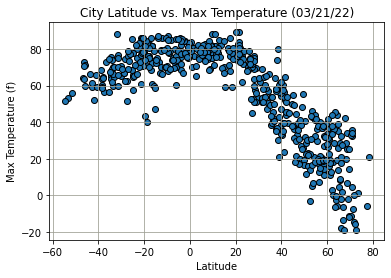

In [10]:
#Get today's date and format it mm/dd/yy
Today = date.today()
Todays_date = Today.strftime('%m/%d/%y')

#Creating City Latitude vs Max Temperature scatter plot
weather_scatter_plot(Filtered_df['Lat'], Filtered_df['Max Temp'],
                     f'City Latitude vs. Max Temperature ({Todays_date})',
                     'Latitude', 'Max Temperature (f)')

#Saving Figure to my output_data folder
plt.savefig("../output_data/Lat_vs_MaxTemp.png")

#Show the plot
plt.show()

Analysis:
This graph shows us that the furthest we are from the equator the maximum temperature drops. The reason behind it - earth shape is round and not every place on earth receives the same amount of sunlight heat (warmth). Also, we see our Max Temperature isn't exactly on 0 degree Latitude but rather between 20 and 30 degree Latitudes. This makes sense as we know that the maximum temperature on Earth are around the Tropic of Cancer.

## Latitude vs. Humidity Plot

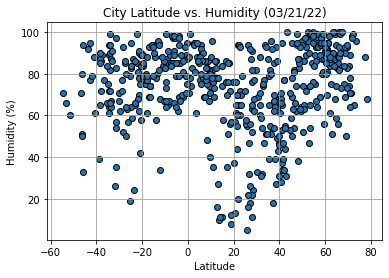

In [11]:
#Creating City Latitude vs Humidity scatter plot
weather_scatter_plot(Filtered_df['Lat'], Filtered_df['Humidity'],
                     f'City Latitude vs. Humidity ({Todays_date})',
                     'Latitude', 'Humidity (%)')

#Saving Figure to my output_data folder
plt.savefig("../output_data/Lat_vs_Humidity.png")

#Show the plot
plt.show()

Analysis:
It doesn't seem like there is any correlation between Latitude and Humidity. The Humidity in cities is spread out across all Latitudes.

## Latitude vs. Cloudiness Plot

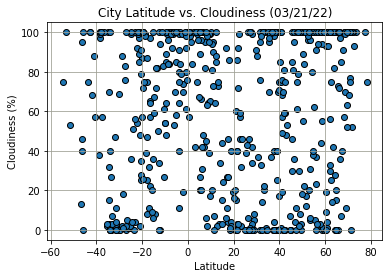

In [12]:
#Creating City Latitude vs Cloudiness scatter plot
weather_scatter_plot(Filtered_df['Lat'], Filtered_df['Cloudiness'],
                     f'City Latitude vs. Cloudiness ({Todays_date})',
                     'Latitude', 'Cloudiness (%)')

#Saving Figure to my output_data folder
plt.savefig("../output_data/Lat_vs_Cloudiness.png")

#Show the plot
plt.show()

Analysis:
There is no correlations between Latitude and Cloudiness. However, we do see there are bands of cities at various levels of Cloudiness (for example, Cloudiness: 0, 20, 40, 75,90, 100).

## Latitude vs. Wind Speed Plot

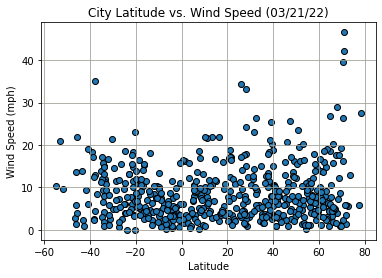

In [13]:
#Creating City Latitude vs Wind Speed scatter plot
weather_scatter_plot(Filtered_df['Lat'], Filtered_df['Wind Speed'],
                     f'City Latitude vs. Wind Speed ({Todays_date})',
                     'Latitude', 'Wind Speed (mph)')

#Saving Figure to my output_data folder
plt.savefig("../output_data/Lat_vs_WindSpeed.png")

#Show the plot
plt.show()

Analysis:
There is no strong corelation between Latitude and Wind Speed. The plot shows that most of the cities fall into 0 to 15 mph Wind Speed.

## Linear Regression

In [14]:
#Defining a general function to create Linear Regression Plots
def plot_linear_regression(x_values, y_values, x_line_eq, y_line_eq, x_label, y_label):
    
    #Perform  Linear Regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) 
    
    #Get regression values
    regress_values = x_values * slope + intercept
    
    #Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #Create Scatter Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    #Displaying equation on the plot
    plt.annotate(line_eq,(x_line_eq, y_line_eq),fontsize=15,color="red")
    
    #Labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    #Printing r-values
    print(f'The r-value is: {rvalue**2}')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7923485717506374


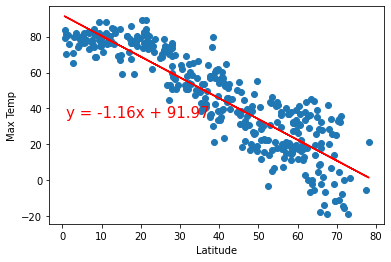

In [15]:
#Filtering the Data to get Northern Hemisphere
Northern_df = Filtered_df.loc[Filtered_df['Lat']>0, :]

#Plotting Latitude vs Max Temp chart for the Nothern Hemisphere 
plot_linear_regression(Northern_df['Lat'], Northern_df['Max Temp'],1,35,'Latitude', 'Max Temp')

#Saving Figure to my output_data folder
plt.savefig("../output_data/NorthernHem_Lat_vs_MaxTemp.png")

#Show the plot
plt.show()

Analysis:
There is moderate negative relationship between Latitude and Max Temp in the Northern Hemisphere. Max Temp decreases when we move away from the equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.2776776455247449


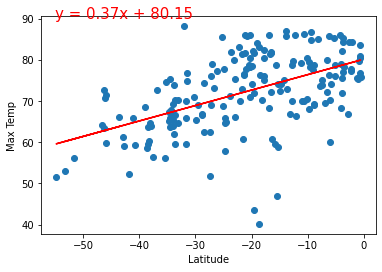

In [16]:
#Filtering the Data to get Southern Hemisphere
Southern_df = Filtered_df.loc[Filtered_df['Lat']<0, :]

#Plotting Latitude vs Max Temp chart for the Souhern Hemisphere 
plot_linear_regression(Southern_df['Lat'], Southern_df['Max Temp'],-55,90,'Latitude', 'Max Temp')

#Saving Figure to my output_data folder
plt.savefig("../output_data/SouthernHem_Lat_vs_MaxTemp.png")

#Show the plot
plt.show()

Analysis:
There is moderate positive relationship between Latitude and Max Temp in the Southern Hemisphere. As we get closer to equator, temperature increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.07718512413796076


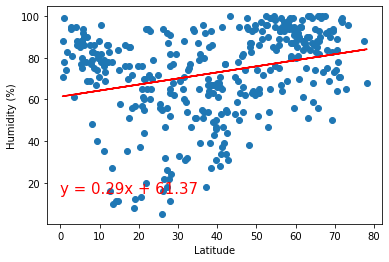

In [17]:
#Plotting Latitude vs Humidity chart for the Nothern Hemisphere 
plot_linear_regression(Northern_df['Lat'], Northern_df['Humidity'],0,15,'Latitude', 'Humidity (%)')

#Saving Figure to my output_data folder
plt.savefig("../output_data/NorthernHem_Lat_vs_Humidity.png")

#Show the plot
plt.show()

Analysis:
Our r-value is very close to 0. It is fair to say there is no linear relationship (if r < 0.25, it is consiedered as no relationship) between Latitude vs Humidity in the Nothern Hemisphere. Humidity level isn't affected by Latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.061189886794328914


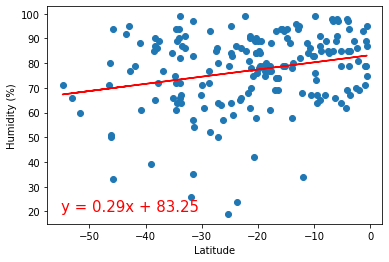

In [18]:
#Plotting Latitude vs Humidity chart for the Southern Hemisphere 
plot_linear_regression(Southern_df['Lat'], Southern_df['Humidity'],-55,20,'Latitude', 'Humidity (%)')

#Saving Figure to my output_data folder
plt.savefig("../output_data/SouthernHem_Lat_vs_Humidity.png")

#Show the plot
plt.show()

Analysis:
Our r-value is very close to 0. It is fair to say there is no linear relationship (if r < 0.25, it is consiedered as no relationship) between Latitude vs Humidity in the Southern Hemisphere. Humidity level isn't affected by Latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.016001455839304794


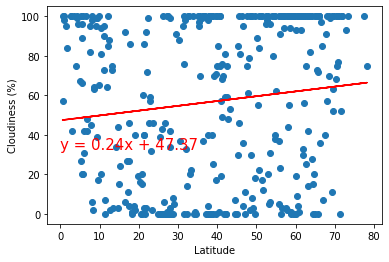

In [19]:
#Plotting Latitude vs Cloudiness chart for the Nothern Hemisphere 
plot_linear_regression(Northern_df['Lat'], Northern_df['Cloudiness'],0,33,'Latitude', 'Cloudiness (%)')

#Saving Figure to my output_data folder
plt.savefig("../output_data/NorthernHem_Lat_vs_Cloudiness.png")

#Show the plot
plt.show()

Analysis:
Our r-value is very close to 0. It is fair to say there no linear relationship (if r < 0.25, it is consiedered as no relationship) between Latitude vs Cloudiness in the Nothern Hemisphere. Level of Cloudiness isn't affected by Latitude. The interesting thing here - there are bands of cities at certain cloudiness levels.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07568559656192633


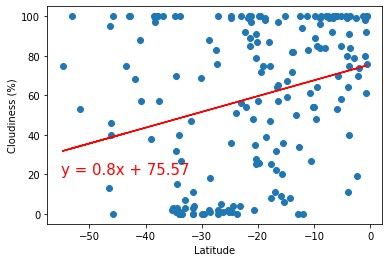

In [20]:
#Plotting Latitude vs Cloudiness chart for the Sothern Hemisphere 
plot_linear_regression(Southern_df['Lat'], Southern_df['Cloudiness'],-55,20,'Latitude', 'Cloudiness (%)')

#Saving Figure to my output_data folder
plt.savefig("../output_data/SouthernHem_Lat_vs_Cloudiness.png")

#Show the plot
plt.show()

Analysis:
Our r-value is very close to 0. It is fair to say there is no linear relationship (if r < 0.25, it is consiedered as no relationship) between Latitude vs Cloudiness in the Southern Hemisphere. Level of Cloudiness isn't affected by Latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.00898068073473699


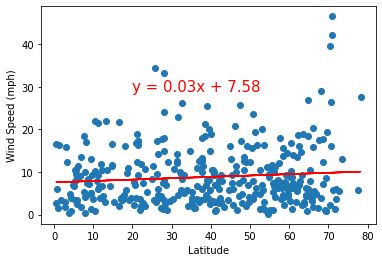

In [21]:
#Plotting Latitude vs Wind Speed chart for the Nothern Hemisphere 
plot_linear_regression(Northern_df['Lat'], Northern_df['Wind Speed'],20,29,'Latitude', 'Wind Speed (mph)')

#Saving Figure to my output_data folder
plt.savefig("../output_data/NorthernHem_Lat_vs_WindSpeed.png")

#Show the plot
plt.show()

Analysis:
Our r-value is very close to 0. It is fair to say there is no relationship (if r < 0.25, it is consiedered as no relationship) between Latitude vs Wind Speed in the Northern Hemisphere. Wind Speed isn't affected by Latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.10140564775472584


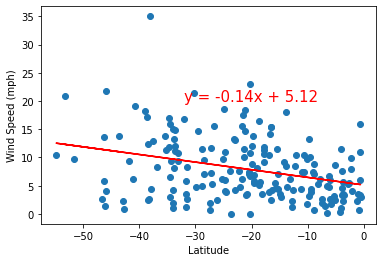

In [22]:
#Plotting Latitude vs Wind Speed chart for the Sothern Hemisphere 
plot_linear_regression(Southern_df['Lat'], Southern_df['Wind Speed'],-32,20,'Latitude', 'Wind Speed (mph)')

#Saving Figure to my output_data folder
plt.savefig("../output_data/SouthernHem_Lat_vs_WindSpeed.png")

#Show the plot
plt.show()

Analysis:
Our r-value is very close to 0. It is fair to say there is no relationship (if r < 0.25, it is consiedered as no relationship) between Latitude vs Wind Speed in the Southern Hemisphere. Wind Speed isn't affected by Latitude.